<a href="https://colab.research.google.com/github/ilovesylus/computer/blob/main/EX04_05_%E8%BE%A8%E8%AD%98%E9%B3%B6%E5%B0%BE%E8%8A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 問題定義

使用 Scikit-Learn 內建的鳶尾花資料集，以 K 近鄰演算法辨識鳶尾花。
進行參數調校

## 資料收集

In [50]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

X, y = iris.data, iris.target
df = iris.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 資料前清理



## 資料清理


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 探索性分析

In [52]:
df_cor = df.corr()
df_cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


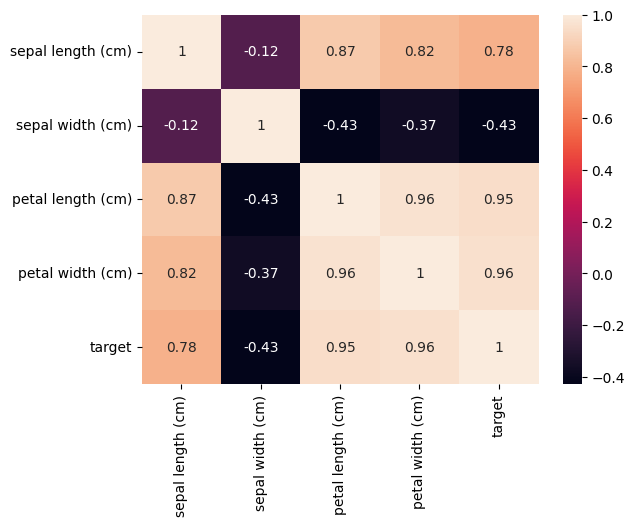

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data=df_cor,annot=True)
plt.show()

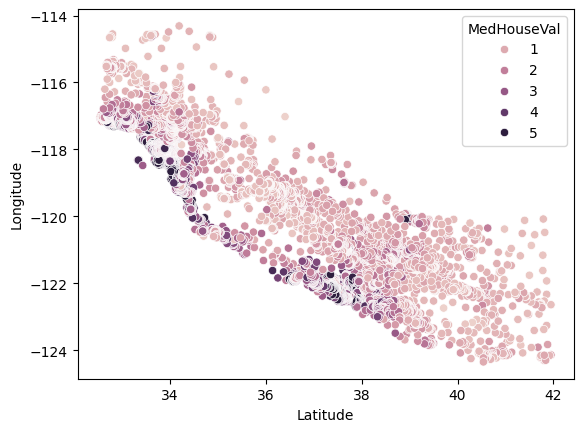

In [23]:
sns.scatterplot(data=df,x='Latitude',y='Longitude',hue='MedHouseVal')
plt.show()

### 資料分割

### 類別轉換

In [54]:
from sklearn.model_selection import train_test_split
# X: features, y: label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 特徵縮放

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 模型訓練

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
knn.score(X_train, y_train)

0.9583333333333334

## 模型評估

In [59]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(X_test)

print("準確率：", accuracy_score(y_test, y_pred))
print("分類報告：\n", classification_report(y_test, y_pred))

準確率： 1.0
分類報告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 模型調整

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7],'weights':["uniform","distance"]}
grid = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [63]:
grid.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [64]:
grid.best_score_

np.float64(0.95)

## 模型部署

### 儲存模型

In [74]:
import joblib

joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']

### 推論預測

In [78]:
import joblib

loaded_knn = joblib.load('knn_model.pkl')
loaded_scaler = joblib.load('scaler_model.pkl')

In [79]:
import pandas as pd
data = {
    'sepal length (cm)': [5.1],
    'sepal width (cm)': [3.5],
    'petal length (cm)': [1.4],
    'petal width (cm)': [0.2]
}
virtual_df = pd.DataFrame(data, columns=data.keys())


virtual_df = loaded_scaler.transform(virtual_df)
prediction = loaded_knn.predict(virtual_df)
print("The predicted class is:",prediction)

iris_target_names = iris.target_names
predicted_class_name = iris_target_names[prediction[0]]
print("The predicted iris species name is:",predicted_class_name)

print(pred)

The predicted class is: [0]
The predicted iris species name is: setosa
[4.9845245]
